### MA5203 - Aprendizaje de Máquinas Probabilístico
# Tarea 5

## Nombre: Sebastián Parra

In [1]:
%matplotlib inline 

# Importar librerías
import numpy as np
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración para los gráficos
sns.set_context('notebook', font_scale=1.2)
sns.set_style('white', {'legend.frameon':True})
plt.rcParams['figure.figsize'] = (14, 6)

## P1. Experimento Controlado
### Parte a)

In [3]:
def generar_puntos(n, lmbd):
    # Genera 2n puntos a partir de las distribuciones normales N0((0, lmbd), I) y N1((0, -lmbd), I). Tambien se 
    # generará un vector de etiquetas que indicará si un punto pertenece a la distribución N0 (0) o N1(1)
    # input: 
    #    n (int): Se generarán 2*n puntos, n para cada distribución
    #    lmbd (float): Especifica la coordenada Y de la esperanza de ambas distribuciones normales
    # output:
    #    puntos (array[float]): Matriz de 2n X 3 donde las primeras dos columnas son las coordenadas (X,Y) de los
    #    puntos, y la tercera indica a qué distribución pertenece
    
    puntos = np.zeros((2*n, 3))
    
    media_0 = [0, lmbd]
    cov_0 = np.identity(2)
    puntos[:n, :2] = np.random.multivariate_normal(media_0, cov_0, n)
    puntos[:n, 2] = 0 
    
    media_1 = [0, -lmbd]
    puntos[n:, :2] = np.random.multivariate_normal(media_1, cov_0, n)
    puntos[n:, 2] = 1
    
    return puntos

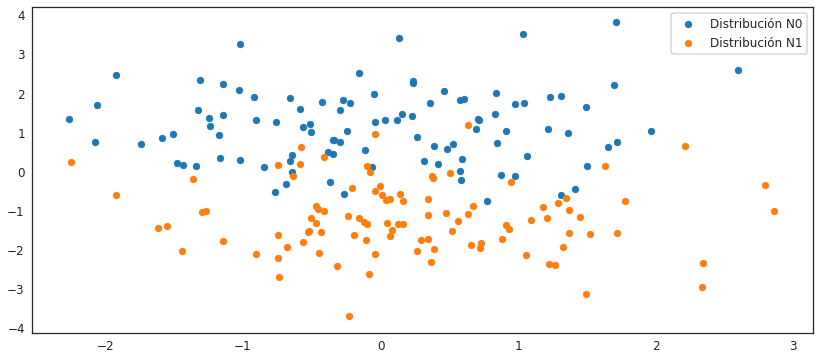

In [4]:
# Graficar puntos
samples = generar_puntos(100, 1.2)
plt.scatter(samples[:100, 0], samples[:100, 1], label='Distribución N0')
plt.scatter(samples[100:, 0], samples[100:, 1], label='Distribución N1')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.show()

### Parte b)

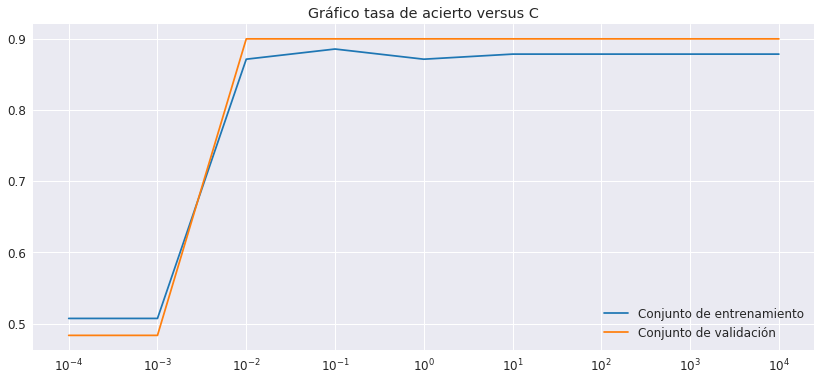

In [5]:
# Dado que los datos anteriores son casi linealmente separables, se utilizarán para esta parte también
# Paso 1: Obtener conjuntos aleatorios de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(samples[:, :2], samples[:, 2], test_size=0.3, random_state=3)

# Paso 2: Obtener tasa de acierto para SVM con distintos valores de C
C_vector = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
accs_train = []
accs_val = []
for C in C_vector:
    clf = SVC(C=C, kernel='linear')
    clf.fit(X_train, y_train)
    accs_train.append(clf.score(X_train, y_train))
    accs_val.append(clf.score(X_val, y_val))

# Paso 3: Graficar tasas de acierto versus C
with sns.axes_style('darkgrid'):
    plt.plot(C_vector, accs_train, label='Conjunto de entrenamiento')
    plt.plot(C_vector, accs_val, label='Conjunto de validación')
    plt.xscale('log')
    plt.title('Gráfico tasa de acierto versus C')
    leg = plt.legend()
    leg.get_frame().set_edgecolor('black')
    plt.show()


### Parte c)

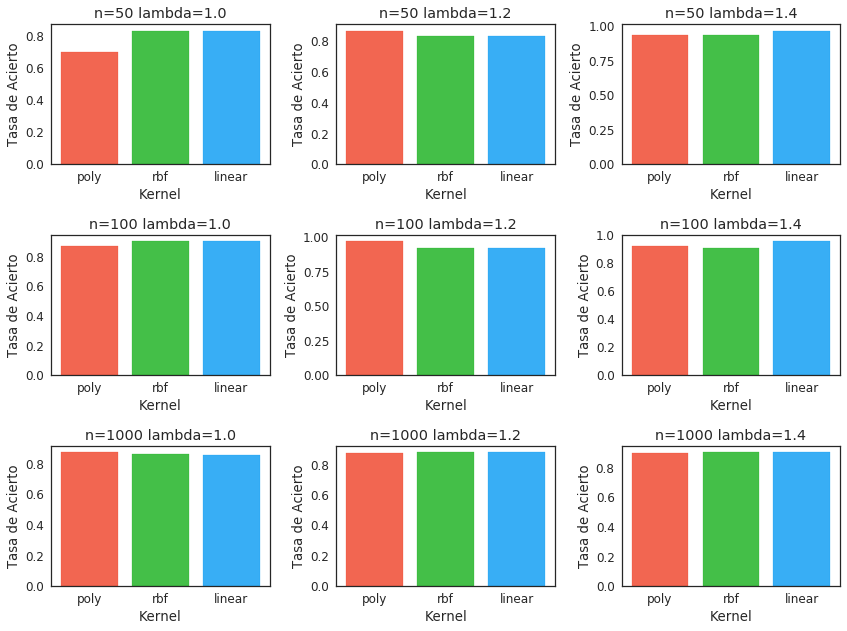

[[0.83333333 0.86666667 0.96666667]
 [0.9        0.96666667 0.95      ]
 [0.875      0.88166667 0.90333333]]


In [6]:
# 3 valores de n, 3 lambdas para cada n, y tres kernels para cada combinación
n_values = [50, 100, 1000]
lambda_values = [1.0, 1.2, 1.4]
kernels = ['poly', 'rbf', 'linear']
max_accs = np.zeros((3,3))

# Configuraciones para los graficos
f, axes = plt.subplots(3, 3, figsize=(12,9))
plt.setp(axes, xticks=[1, 2, 3], xticklabels=kernels, xlabel='Kernel', ylabel='Tasa de Acierto')
x = [1, 2, 3]
for n in range(len(n_values)):
    for l in range(len(lambda_values)):
        # Para cada combinacion, generar muestras y separar entre entrenamiento y vaidación
        samples = generar_puntos(n_values[n], lambda_values[l])
        X_train, X_val, y_train, y_val = train_test_split(samples[:, :2], samples[:, 2], test_size=0.3, random_state=5)
        accs =[]
        for k in kernels:
            # Entrenar SVM con kernel polinomial, rbf y lineal
            clf = SVC(kernel=k)
            clf.fit(X_train, y_train)
            # Medida de desempeño: tasa de acierto de validación
            accs.append(clf.score(X_val, y_val))
        # Guardar maxima tasa de acierto
        max_accs[n,l] = max(accs)
        # Graficar desempeño para comparar entre kernels, para cada combinación (n, lambda)
        barlist = axes[n,l].bar(x, accs, alpha=0.8)
        barlist[0].set_color('xkcd:tomato')
        barlist[1].set_color('xkcd:green')
        barlist[2].set_color('xkcd:azure')
        axes[n,l].title.set_text('n=' + str(n_values[n]) + ' lambda=' + str(lambda_values[l]))

plt.tight_layout()
plt.show()

print(max_accs)

## P2. Datos Reales

In [7]:
# Paso 1: Visualizar base de datos
import pandas as pd
    
df = pd.read_excel("data_salaries.xlsx", usecols="A,B,D:O", na_values=[" ?", "?"])
df

,Age,Workclass,education,eduaction_num,marital,ocupation,relationship,race,sex,capital gain,capital loss,hr_per_week,country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
# Paso 2: Remover características poco útiles

# Por la naturaleza del problema, podemos remover ciertas características. 
df = df.drop(columns=["Workclass", "marital", "relationship"])
# Dado que es una variable bastante incompleta, podemos remover "capital gain" y "capital loss"
df = df.drop(columns=["capital gain", "capital loss"])
df

,Age,education,eduaction_num,ocupation,race,sex,hr_per_week,country,income
0,39,Bachelors,13,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Bachelors,13,Exec-managerial,White,Male,13,United-States,<=50K
2,38,HS-grad,9,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,11th,7,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Bachelors,13,Prof-specialty,Black,Female,40,Cuba,<=50K
5,37,Masters,14,Exec-managerial,White,Female,40,United-States,<=50K
6,49,9th,5,Other-service,Black,Female,16,Jamaica,<=50K
7,52,HS-grad,9,Exec-managerial,White,Male,45,United-States,>50K
8,31,Masters,14,Prof-specialty,White,Female,50,United-States,>50K
9,42,Bachelors,13,Exec-managerial,White,Male,40,United-States,>50K


In [9]:
# Analizar variables "eucation" y "eduaction_num"
print(df["education"].value_counts())
print(df["eduaction_num"].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: eduaction_num, dtype: int64


In [10]:
# Se puede notar que existe el mismo numero de categorias, con a misma distribución de frecuencia
# Esto indica que podria tratarse de la misma variable, codificada de manera distinta.
df[["education", "eduaction_num"]].head(20)

,education,eduaction_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [11]:
# Lo cual corrobora que son las mismas variables, solo que una se encuentra ordenada numericamente,
# por lo que eliminamos la variable categórica.
df = df.drop(columns=["education"])
df

,Age,eduaction_num,ocupation,race,sex,hr_per_week,country,income
0,39,13,Adm-clerical,White,Male,40,United-States,<=50K
1,50,13,Exec-managerial,White,Male,13,United-States,<=50K
2,38,9,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,7,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,13,Prof-specialty,Black,Female,40,Cuba,<=50K
5,37,14,Exec-managerial,White,Female,40,United-States,<=50K
6,49,5,Other-service,Black,Female,16,Jamaica,<=50K
7,52,9,Exec-managerial,White,Male,45,United-States,>50K
8,31,14,Prof-specialty,White,Female,50,United-States,>50K
9,42,13,Exec-managerial,White,Male,40,United-States,>50K


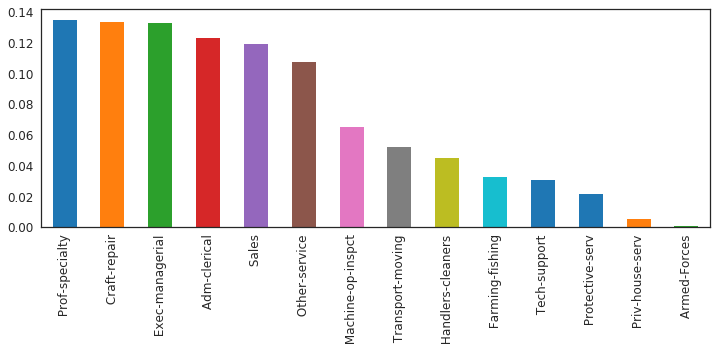

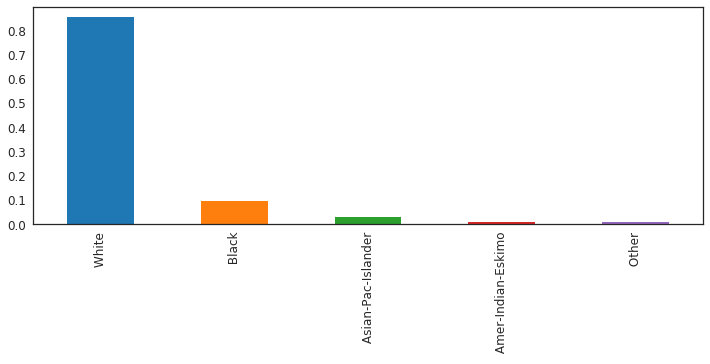

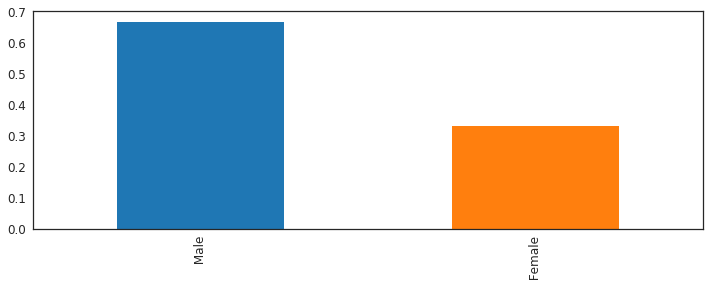

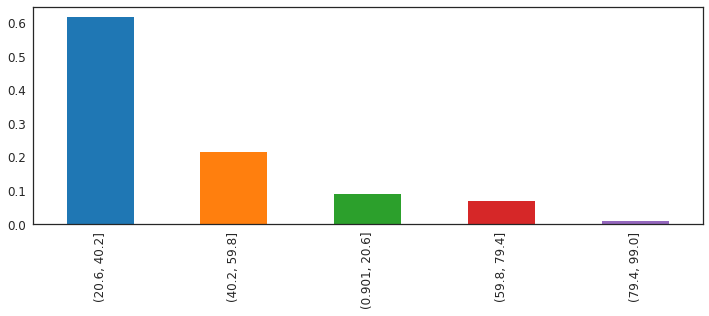

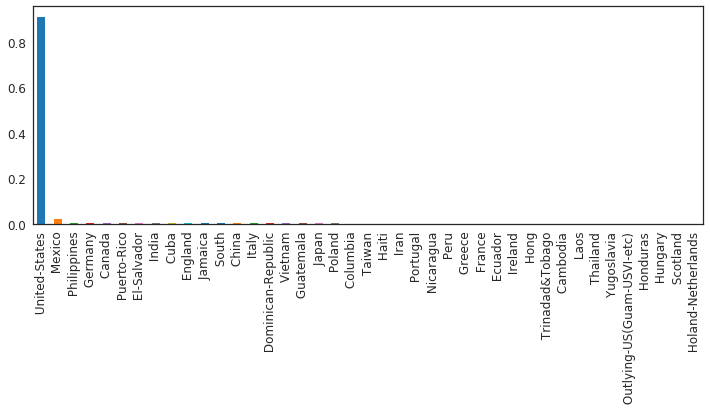

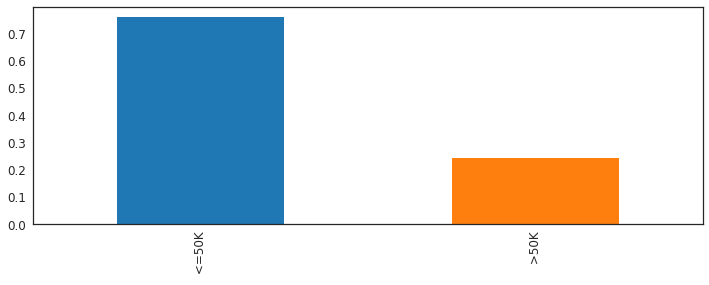

In [12]:
# Ahora, revisando las distribuciones de las otras características
df["ocupation"].value_counts(normalize=True).plot(kind='bar', figsize=(12,4))
plt.show()
df["race"].value_counts(normalize=True).plot(kind='bar', figsize=(12,4))
plt.show()
df["sex"].value_counts(normalize=True).plot(kind='bar', figsize=(12,4))
plt.show()
df["hr_per_week"].value_counts(normalize=True, bins=5).plot(kind='bar', figsize=(12,4))
plt.show()
df["country"].value_counts(normalize=True).plot(kind='bar', figsize=(12,4))
plt.show()
df["income"].value_counts(normalize=True).plot(kind='bar', figsize=(12,4))
plt.show()

In [13]:
# Botamos la columna "country" porque la gran mayoria de los datos son de estadounidenses
df = df.drop(columns=["country"])
df

,Age,eduaction_num,ocupation,race,sex,hr_per_week,income
0,39,13,Adm-clerical,White,Male,40,<=50K
1,50,13,Exec-managerial,White,Male,13,<=50K
2,38,9,Handlers-cleaners,White,Male,40,<=50K
3,53,7,Handlers-cleaners,Black,Male,40,<=50K
4,28,13,Prof-specialty,Black,Female,40,<=50K
5,37,14,Exec-managerial,White,Female,40,<=50K
6,49,5,Other-service,Black,Female,16,<=50K
7,52,9,Exec-managerial,White,Male,45,>50K
8,31,14,Prof-specialty,White,Female,50,>50K
9,42,13,Exec-managerial,White,Male,40,>50K


In [14]:
# Pasar variables categoricas a one-hot
df = pd.get_dummies(df, columns=["ocupation", "race", "sex"])
# Pasar "income" a labels binarias
df = df.replace([" <=50K", " >50K"], [0, 1])
df

,Age,eduaction_num,hr_per_week,income,ocupation_ Adm-clerical,ocupation_ Armed-Forces,ocupation_ Craft-repair,ocupation_ Exec-managerial,ocupation_ Farming-fishing,ocupation_ Handlers-cleaners,...,ocupation_ Sales,ocupation_ Tech-support,ocupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,53,7,40,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,37,14,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
6,49,5,16,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,52,9,45,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
8,31,14,50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,42,13,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
# Obtener arrays de numpy para los features y labels
labels = df[["income"]].values.ravel()
df = df.drop(columns=["income"])
features = df.values

print("Dimensiones de matriz de características: " + str(features.shape))
print("Dimensiones de vector de etiquetas: " + str(labels.shape))

Dimensiones de matriz de características: (32561, 24)
Dimensiones de vector de etiquetas: (32561,)


In [16]:
# Paso 3: Entrenar clasificador

# Definir métrica de evaluación: Indice de Younen
def younen_index(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    TP = conf_mat[1,1]
    FN = conf_mat[1,0]
    TN = conf_mat[0,0]
    FP = conf_mat[0,1]
    return TP/(TP+FN) + TN/(TN+FP) - 1

younen_score = make_scorer(younen_index, greater_is_better=True)

# Obtener conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Ajustar hiperparámetros con validación cruzada
parametros = [{'kernel': ['rbf'], 'gamma': [0.1, 1, 10],
                     'C': [0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10]}]
clf = GridSearchCV(SVC(), parametros, cv=5, scoring=younen_score, iid=False, n_jobs=-1)
clf.fit(X_train, y_train)
print("Parámetros encontrados por validación cruzada:")
print(clf.best_params_)

# Calcular predicciones
y_pred = clf.predict(X_test)
# Obtener métricas
print(classification_report(y_test, y_pred))
print("Indice de Younen: " + str(younen_index(y_test, y_pred)))

Parámetros encontrados por validación cruzada:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
             precision    recall  f1-score   support

          0       0.85      0.90      0.87      4942
          1       0.61      0.49      0.54      1571

avg / total       0.79      0.80      0.79      6513

Indice de Younen: 0.39164956396812833


In [17]:
confusion_matrix(y_test, y_pred)

array([[4449,  493],
       [ 799,  772]])